<a href="https://colab.research.google.com/github/git-hys/Python25Study/blob/main/03_01_K%EC%B5%9C%EA%B7%BC%EC%A0%91%EC%9D%B4%EC%9B%83_%ED%9A%8C%EA%B7%80%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 겨울철 대방어철로 대방어 주문이 크게 늘어 MBC 마켓에서 업계최초로 대방어를 무게 단위로 판매하려함
# 무게단위로 판매를 하면 가격측정도 원할하고 고객도 합리적으로 판단할 수 있다.
# 그런데 공급처에서 생선 무게를 잘못 측정해서 보낼 수 있다.

# 대방어의 무게를 재측정해야한다
# 다른 데이터는 정상범위가 있으니 예측할 수 있을까
#  이렇게 예측하는 것을 회귀라고 한다(샘플데이터 필요/외부에서 56개의 샘플을 받아서 처리) 지도학습은 크게 2가지로 나누어짐
# 2진분류 : from sklearn.neighbors import KNeighborsClassifier
# 회귀 (예측 : 확률(임의의 어떤 숫자로 예측)) : from sklearn.neighbors import KNeighborsRegressor
# 회귀 : 두 변수 사이에 상관관계를 분석하는법



In [3]:
# 리눅스 명령어로 코랩의 가상머신에 나눔폰트를 설치하고 적용하는 명령어
# 차트에 한글처리용

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [5]:
# 대방어의 샘플자료 56개
import numpy as np
# 대방어의 길이 배열리스트
Yellowtail_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
# 대방어의 무게 배열리스트
Yellowtail_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

기초자료


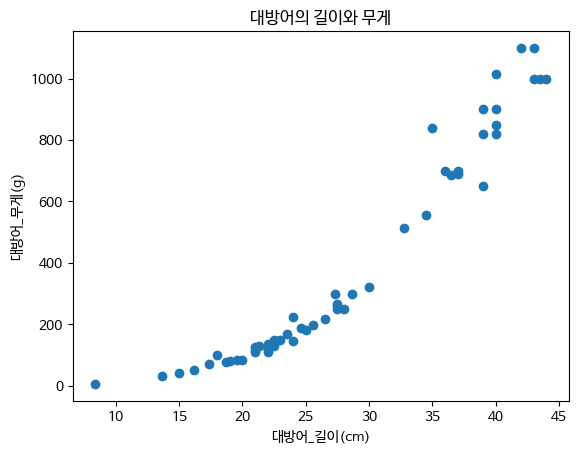

In [10]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.scatter(Yellowtail_length, Yellowtail_weight) # 방어의 길이(X축), 방어의 무게(Y축)
plt.xlabel('대방어_길이(cm)')
plt.ylabel('대방어_무게(g)')
print('기초자료')
plt.title('대방어의 길이와 무게')
plt.show()

# 산점도를 그리고 나니 커짐에 따라 무게도 늘어남
# 이 데이터를 토대로 훈련(.fit)과 테스트(.score)를 진행해 보자.


In [11]:
# k- 최근접 이웃 알고리즘에서의 회귀KNeighborsRegressor
# 예측하려는 샘플에 가장 가까운 샘플 k개를 선택한다
# 이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측
# k=3이라고 가정하면 2개의 다수가 있어 분류는 사각형으로 판단
# 회귀는 샘플에 가장 가까운 샘플k개를 선택한다
# 타깃값 100, 80, 60 을 더해 3으로 나눈 평균이 타깃 값으로 사용

In [12]:
# 사이킷 런에서 제공하는 훈련세트, 테스트 세트 생성
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(Yellowtail_length, Yellowtail_weight, random_state=42)

 # stratify 사용하지 않음(분류용) -> 정답 파일이 무게 확률이기 때문에
 # 사이킷 런의 train_test_split 함수를 사용해 훈련/테스트 세트로 나눔
 # random_state=42 서로 같은 테스트를 위해 시드 값 제공
 # Yellowtail_length가 1차원 배열이기에 이를 나눈 train_input와 test_input도 1차원 배열임
 # [3,] -> [3,1] 2차원 배열을 사용해야 함으로 억지로 변환 reshape() 메서드 활용

In [13]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [14]:
# 2차원 배열로 변환
test_array = test_array.reshape(2,2) # 강제로 2차원 배열로 만듦
print(test_array.shape)
# 전에는 2개의 특성으로 사용했기에 자연스럽게 2차원 배열을 사용했지만 이번엔 1개의 특성임으로 수동으로 2차원 배열을 만들어줌


(2, 2)


In [15]:
print(test_array)

[[1 2]
 [3 4]]


In [16]:
# 입력데이터인 train_input과 test_input를 2차워 배열로 바꿔야함
# train_input (42,) -> (42,1) -> train_input.reshape(42,1)
# 넘파이는 배열의 크기를 자동으로 지정하는 기능도 제공 (-1) 값을 넣으면 됨

train_input = train_input.reshape(-1,1) # -1 지정하면 원소수로 모두 채움
test_input = test_input.reshape(-1,1) #
print(train_input.shape, test_input.shape) # -1을 사용하면 매번 원소의 크기를 외우지 않아도 됨

(42, 1) (14, 1)


In [17]:
print(train_input)


[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]


In [20]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor() # 회귀용 객체 생성
knr.fit(train_input, train_target) # 회귀용 훈련
#        방어 길이   방어 무게

KNeighborsRegressor()

In [22]:
knr.score(test_input, test_target)
# 농어 테스트 길이, 테스트 무게
# 분류의 경우에는 테스트 세트에 있는 샘플을 정확하게 분류한 개슈의 비율(정확도) -> 예측값

# 회귀인 경우에는 평가를 결정계수라고 함 R^2
# R^2 =1 =((타깃 - 예측)^2의 합) / ((타깃 - 평균)^2의 합)
# 타깃의 평균정도를 예측하는 수준 - > R^2는 0에 가까워지고, 예측이 타깃에 가까워지면 1에 가까운 결과로 99.28% 예측

0.992809406101064

In [23]:
knr.predict([[15]])

array([60.])

In [26]:
# sklearn.metrics 패키지 아래 여러가지 측정도구를 제공
# mean_absolute_error 절대값 오차를 평균하여 반환
from sklearn.metrics import mean_absolute_error # 평균으로 절대값의 오차를 찾는 메서드
  # 테스트 세트에 대한 예측(prediction)을 만듦
test_prediction = knr.predict(test_input)
 # 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)


19.157142857142862


In [28]:
print(knr.score(train_input, train_target)) # 훈련한 모델을 사용해 훈련세트 점수 확인
# 훈련세트로 진행한 평가 점수 96.98%
print(knr.score(test_input, test_target))
# 테스트세트로 진행한 평가 점수 99.28%

0.9698823289099254
0.992809406101064


In [30]:
# 위 결과를 보면 모델을 훈련 세트에 훈련하면 훈련세트에 잘 맞는 모델이 만들어짐
# 이모델을 훈련세트와 테스트 세트에서 평가하면 두 값중 어느것이 높을까

# 보통 훈련세트의 점수가 좀 더 높게 나옴
# 훈련세트에서 점수가 굉ㅈ아히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁘면 과대 적합
# 과소적합 : 훈련세트보다 테스트 세트가 점수가 높거나 또는 두 세트 모두 점수가 낮은 경우

In [32]:
# 사이킷 런의 알고리즘 값을 3개로 조절해보자
# 사이킷 런의 k-최근접 이웃 기본값이 5를 3으로 변경
# 이웃의 갯수를 3개로 설정
knr.n_neighbors = 3
# 모델 재 훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target)) # 3개 이웃 생성훈련 98.04%
print(knr.score(test_input, test_target)) # 3개 이웃 테스트 97.46%

0.9804899950518966
0.9746459963987609


In [33]:
knr.predict([[15]])
# 5개 이웃보다 3개의 이웃을 참고하는 것이 더 좋은 결과가 나옴;

array([47.33333333])

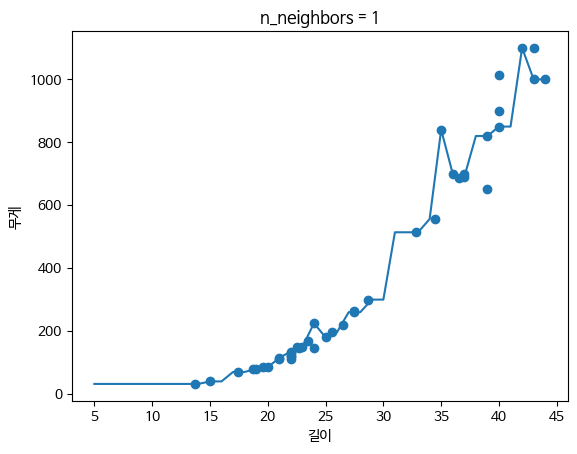

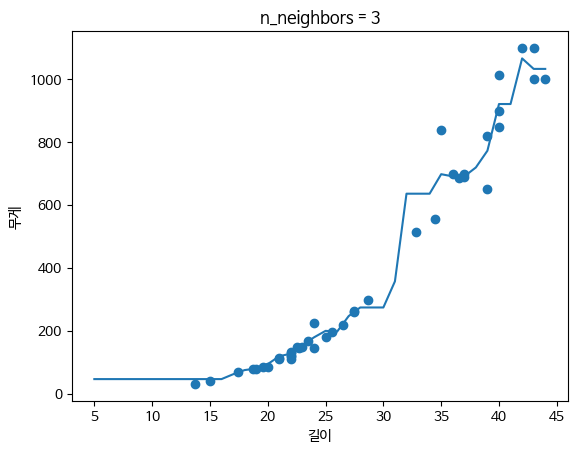

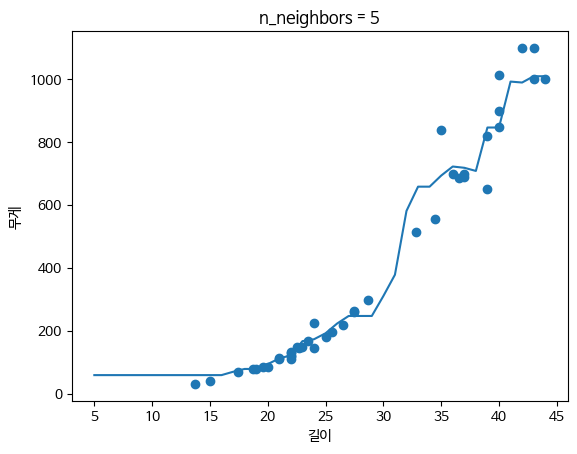

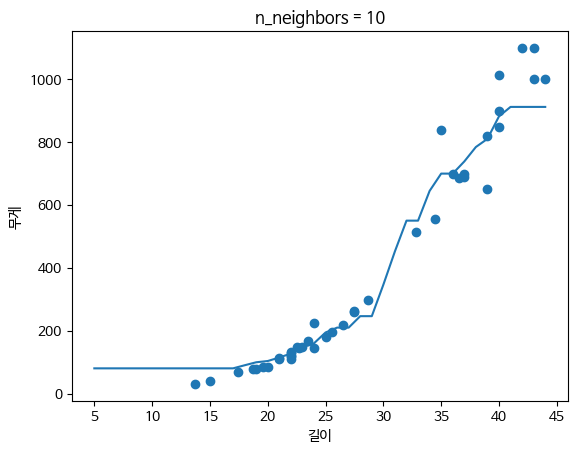

In [35]:
# 앞으로 훈련할때 하이퍼 파라미터 변경으로 좋은 결과를 결정할 때 필수
# 이것을 보고서에 남겨서 선택한 결과를 표출해야함
# 사람이 값을 수동으로 바꿔가면서 훈련을 하면 시간낭비임으로 파이썬의 for문을 많이 사용한다
# 하이퍼 파라미터 값은 대부분 홀수로 사용한다

knr = KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1)

for n in [ 1,3,5,10]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    prediction = knr.predict(x)
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('길이')
    plt.ylabel('무게')
    plt.show()